# 决策树

In [1]:
from  pylab import *
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

In [3]:
X[y==0,0]

array([ 1.4,  1.4,  1.3,  1.5,  1.4,  1.7,  1.4,  1.5,  1.4,  1.5,  1.5,
        1.6,  1.4,  1.1,  1.2,  1.5,  1.3,  1.4,  1.7,  1.5,  1.7,  1.5,
        1. ,  1.7,  1.9,  1.6,  1.6,  1.5,  1.4,  1.6,  1.6,  1.5,  1.5,
        1.4,  1.5,  1.2,  1.3,  1.5,  1.3,  1.5,  1.3,  1.3,  1.3,  1.6,
        1.9,  1.4,  1.6,  1.4,  1.5,  1.4])

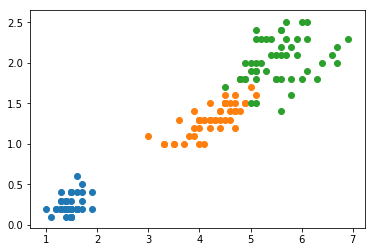

In [4]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

### sklearn中的决策树

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion = "entropy")
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
            np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
            np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1),
            )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap([ '#EF9A9A', '#FFF59D', '#90CAF9' ])
    plt.contourf(x0, x1, zz, linewidth=5, cmap = custom_cmap)
    
     

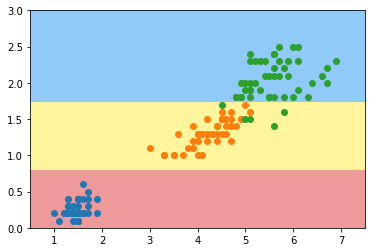

In [7]:
plot_decision_boundary(dt_clf, axis= [0.5, 7.5, 0,3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

## 模拟使用信息熵进行划分

In [8]:
def split(x, y, d, value):
    index_a = (x[:, d] <= value)
    index_b = (x[:, d] > value)
    return x[index_a], x[index_b], y[index_a], y[index_b]

In [9]:
from collections import Counter
def entropy(y):
    counter = Counter(y)
    k = np.array(list(counter.values()),dtype='float')
    p = k/k.sum()
    return np.sum(-p*np.log(p))
        
def try_split(x,y):
    best_entropy = float('inf')
    best_d, best_v = -1, -1
    for d in range(x.shape[1]):
        sorted_index = np.argsort(x[:,d])
        for i in range(1, len(x)):
            if x[sorted_index[i-1],d] != x[sorted_index[i],d]:
                v = ( x[sorted_index[i-1],d] + x[sorted_index[i],d])/2.0
                x_l, x_r, y_l, y_r = split(x, y, d, v)
                e = entropy(y_l) + entropy(y_r)
                if e < best_entropy:
                    best_entropy, best_d, best_v = e, d, v
    return best_entropy, best_d, best_v
                
    
    

In [10]:
try_split(X,y) # 得到划分标准，调用split（x,y,d,v）就可以得到一次决策树的具体划分，然后循环即可。

(0.69314718055994529, 0, 2.4500000000000002)

##  使用基尼系数进行决策树划分

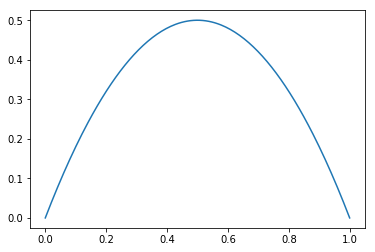

In [11]:
def jini(x):
    return -2*x**2 + 2*x

x = np.linspace(0,1,200)  # x为概率值，0--1
plt.plot(x, jini(x))
plt.show()

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt_clf_gini = DecisionTreeClassifier(max_depth=2, criterion = "gini")
dt_clf_gini.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

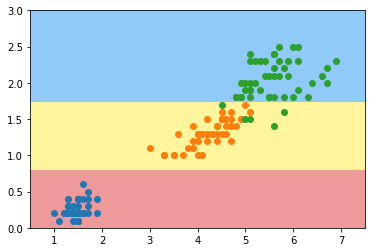

In [13]:
plot_decision_boundary(dt_clf, axis= [0.5, 7.5, 0,3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

信息熵比基尼系数稍慢，因为信息熵中log计算较慢；但两者划分效果基本一样，生成的决策树基本一样，所以一般不作为超参数

##  决策树CART： classification and regression Tree

超参数：
- max_depth
- min_samples_leaf
- min_samples_split
- max_leaf_nodes
- min_weight_fraction_leaf
- min_features

# 使用决策树解决波士顿房价预测问题

In [14]:
boston = datasets.load_boston()
X = boston.data
y = boston.target


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 666)

In [180]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(min_samples_leaf=15, max_depth=6, max_features=11)
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=11,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=15,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [181]:
dt_reg.score(x_train, y_train)

0.84588541875344159

In [182]:
dt_reg.score(x_test, y_test)

0.71780512152198483

#  todo 需要自己实现决策树的自动调参程序
